In [10]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [7]:
# Read data
df = pd.read_csv('../datasets/kings_creek_2022_2023_hourly.csv',
                 parse_dates=['datetime'])
df.head(3)

,datetime,pressure,tavg,rhavg,prcp,srad,wspd,wdir,vpd,vwc_5cm,vwc_20cm,vwc_40cm,soiltemp_5cm,soiltemp_20cm,soiltemp_40cm,battv,discharge
0,2022-01-01 00:00:00,96.40,-4.4,98.012,0.0,NaN,5.94,0.717,0.01,0.257,0.307,0.359,5.2,6.7,7.6,8745.0,0.0
1,2022-01-01 01:00:00,96.39,-5.2,97.873,0.0,NaN,6.22,4.717,0.01,0.257,0.307,0.359,4.9,6.6,7.6,8719.0,0.0
2,2022-01-01 02:00:00,96.44,-6.1,95.025,0.0,NaN,5.56,0.717,0.02,0.257,0.307,0.359,4.7,6.5,7.6,8719.0,0.0


In [8]:
# Compute photosynthetically active radiation
df['par'] = df['srad'] * 0.48

In [9]:
# Model parameters
k = 8 # kPa
TUE = 15
RUE = 1.85
T_base = 10
K = 0.7
Lmax = 7
T1 = 900
alpha = 0.005
beta = 0.002
T2 = 1/beta * np.log(1 + np.exp(alpha*T1))
HI = 0.45 # Approximate harvest index


NameError: name 'np' is not defined

In [ ]:
GDD_cum = np.full_like(N, np.nan)

for t in range(1,N):
    GDD[t] = np.maximum(T_avg-T_base, 0)
    GDD_cum[t] = GDD_cum[t-1] + GDD[t]
    LAI[t] = np.maximum(Lmax*(1/(1+np.exp(-alpha*(GDD[t]-T1))) - np.exp(beta*(GDD[t]-T2))),0)
    Gr[t] = PAR[t] * (1-np.exp(-K*LAI[t])) * RUE * FTSW[t]
    Tr[t] = Gr[t] * VPD[t]/k


In [5]:
df['R-B index'] = df['discharge_diff_sum'] /df['discharge_sum']


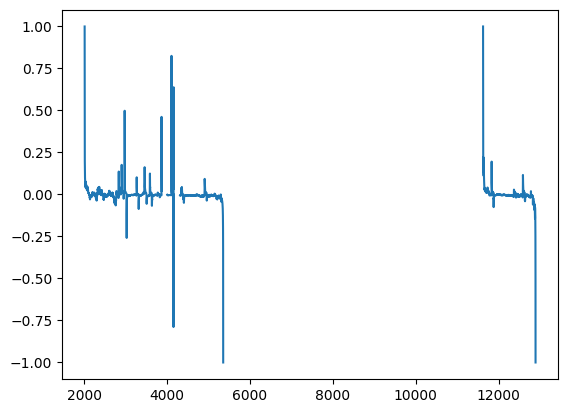

In [6]:
plt.plot(df['R-B index'])

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7fa355c48940> (for post_execute):


KeyboardInterrupt: 

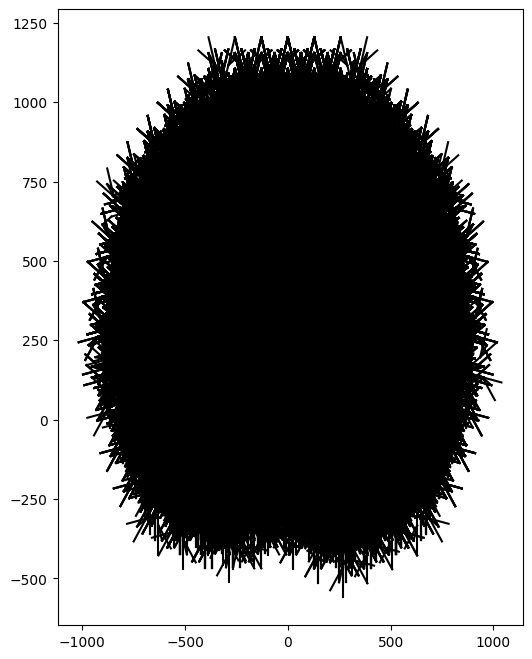

In [16]:
import numpy as np
import matplotlib.pyplot as plt

class RootNode:
    def __init__(self, position, angle, parent=None):
        self.position = position
        self.angle = angle  # Angle of growth
        self.children = []
        self.parent = parent

    def grow(self, levels, branching_chance=0.1, growth_step=5.0, angle_variance=15):
        if levels <= 0:
            return

        # Calculate new position based on growth angle
        dx = growth_step * np.sin(np.radians(self.angle))
        dy = -growth_step * np.cos(np.radians(self.angle))  # Ensure downward growth
        new_position = self.position + np.array([dx, dy])
        new_node = RootNode(new_position, self.angle, self)
        self.children.append(new_node)

        # Randomly decide whether to branch
        if np.random.rand() < branching_chance:
            # Determine new angles for branches
            left_angle = self.angle - angle_variance
            right_angle = self.angle + angle_variance
            
            # Left branch
            branch_position_left = new_position + np.array([growth_step * np.sin(np.radians(left_angle)), 
                                                             -growth_step * np.cos(np.radians(left_angle))])
            branch_node_left = RootNode(branch_position_left, left_angle, self)
            self.children.append(branch_node_left)
            
            # Right branch
            branch_position_right = new_position + np.array([growth_step * np.sin(np.radians(right_angle)), 
                                                              -growth_step * np.cos(np.radians(right_angle))])
            branch_node_right = RootNode(branch_position_right, right_angle, self)
            self.children.append(branch_node_right)

        # Recursively grow children
        for child in self.children:
            child.grow(levels-1, branching_chance, growth_step, angle_variance)

def plot_root(node, ax=None):
    if ax is None:
        ax = plt.gca()
    for child in node.children:
        ax.plot([node.position[0], child.position[0]], [node.position[1], child.position[1]], 'k-')
        plot_root(child, ax)

# Initialize the root system below the soil surface
initial_position = np.array([0, -5])  # Start below the soil surface
root = RootNode(initial_position, angle=180)  # Angle 270 degrees for vertical downward growth

# Grow the root system with specified levels of branching
root.grow(levels=15, branching_chance=0.95, growth_step=50, angle_variance=40)

# Plot the root system
fig, ax = plt.subplots(figsize=(6, 8))
plot_root(root, ax)
ax.set_aspect('equal')
ax.invert_yaxis()  # Invert y-axis to show the root growing downwards
plt.axhline(y=0, color='g', linestyle='-')  # Soil surface
plt.xlabel('Horizontal Position')
plt.ylabel('Depth')
plt.title('Simulation of Plant Root Growth')
plt.show()
